In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("adult 3.csv")

In [3]:
data.shape

(48842, 15)

In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#tochecknullvalues
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [8]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [9]:
data.occupation.replace({'?':'others'},inplace=True)

C:\Temps\ipykernel_16492\2240775719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace=True)


In [10]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [11]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [12]:
data.shape

(48811, 15)

In [13]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [14]:
data.drop(columns=['education'],inplace=True)

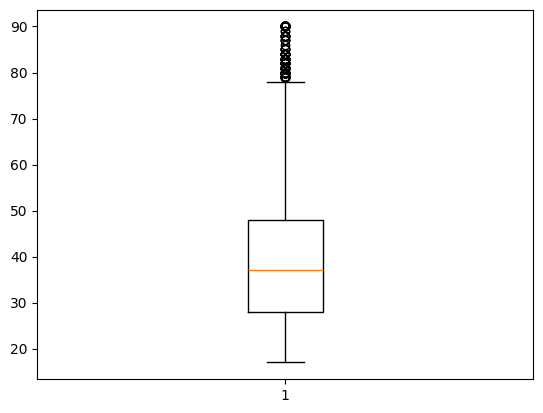

In [15]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [16]:
data=data[(data['age']<=75) & (data['age']>=17)]

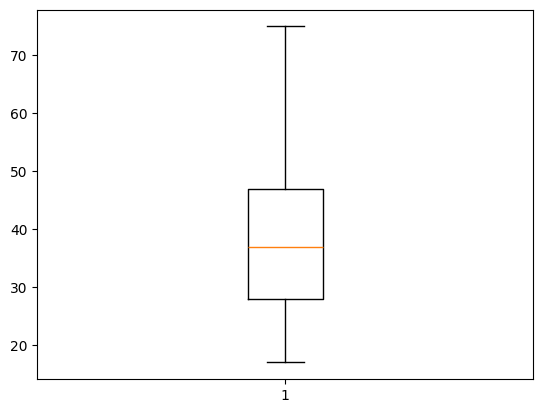

In [17]:
plt.boxplot(data['age'])
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data["workclass"] = encoder.fit_transform(data["workclass"])
data["marital-status"] = encoder.fit_transform(data["marital-status"])
data["occupation"] = encoder.fit_transform(data["occupation"])
data["relationship"] = encoder.fit_transform(data["relationship"])
data["race"] = encoder.fit_transform(data["race"])
data["gender"] = encoder.fit_transform(data["gender"])
data["native-country"] = encoder.fit_transform(data["native-country"])
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,2,336951,12,2,10,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,0,103497,10,4,14,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [19]:
x=data.drop(columns=['income'])
y=data['income']
                     

In [20]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,2,336951,12,2,10,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,0,103497,10,4,14,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [21]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48438, dtype: object

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.33333333, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]], shape=(48438, 13))

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)


In [24]:
xtrain

array([[0.34482759, 0.83333333, 0.11162325, ..., 0.        , 0.39795918,
        0.95121951],
       [0.82758621, 0.66666667, 0.09817775, ..., 0.        , 0.5       ,
        0.95121951],
       [0.12068966, 0.5       , 0.23512582, ..., 0.        , 0.43877551,
        0.95121951],
       ...,
       [0.27586207, 0.5       , 0.1043613 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.77586207, 0.5       , 0.11599233, ..., 0.        , 0.39795918,
        0.95121951],
       [0.34482759, 0.5       , 0.18230381, ..., 0.        , 0.29591837,
        0.95121951]], shape=(38750, 13))

In [25]:
#machine learnng algo
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)#input and output training data
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9688,), dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8266928158546656

In [27]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)#input and output training data
predict1=lr.predict(xtest)
predict1

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9688,), dtype=object)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.8238026424442609

In [29]:
#neural network
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=4000)
clf.fit(xtrain,ytrain)#input and output training data
predict2=clf.predict(xtest)
predict2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9688,), dtype='<U5')

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8440338563170933

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Split data (assuming x and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Store results
results = {}

# Train and evaluate each model using a pipeline
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8271
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7323
        >50K       0.74      0.45      0.56      2365

    accuracy                           0.83      9688
   macro avg       0.79      0.70      0.73      9688
weighted avg       0.82      0.83      0.81      9688

RandomForest Accuracy: 0.8582
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7323
        >50K       0.75      0.63      0.68      2365

    accuracy                           0.86      9688
   macro avg       0.82      0.78      0.80      9688
weighted avg       0.85      0.86      0.85      9688

KNN Accuracy: 0.8286
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7323
        >50K       0.67      0.58      0.62      2365

    accuracy                           0.83      9688
   macro avg       0.77      0.74      0.

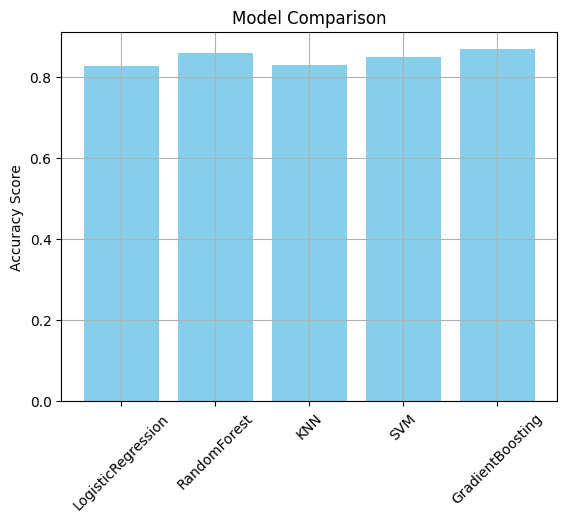

In [32]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color='skyblue')

plt.ylabel('Accuracy Score')

plt.title('Model Comparison')

plt.xticks(rotation=45)

plt.grid(True)

plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load CSV
df = pd.read_csv("adult 3.csv").dropna()

# Drop unnecessary columns
df = df[df['workclass'] != 'Without-pay']
df = df[df['workclass'] != 'Never-worked']
df = df.drop(columns=["education"])

# Encode categorical columns
encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    df[col] = encoder.fit_transform(df[col])

# Features and target
x = df.drop(columns=["income"])  # Keep as DataFrame
y = encoder.fit_transform(df["income"])


In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__max_depth': [3, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(xtrain, ytrain)  # ✅ Now this will work


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'workclass',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week',
                                                                          'native-country']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [])])),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.1, 0.05],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 150]},
             scoring='accuracy', verbose=1)

In [37]:
from sklearn.metrics import accuracy_score, classification_report
import joblib

ypred = grid.predict(xtest)
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

joblib.dump(grid.best_estimator_, "best_model.pkl")


Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
Accuracy: 0.8730922872068012
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7475
           1       0.78      0.65      0.70      2288

    accuracy                           0.87      9763
   macro avg       0.84      0.79      0.81      9763
weighted avg       0.87      0.87      0.87      9763



['best_model.pkl']